# Import Libraries & Dataset

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    f1_score
)

python(45824) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [3]:
# Set path for dataset
path = '/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/02 Data/Prepared Data/'

In [4]:
# Import Scaled Weather Data
df_weather = pd.read_csv(os.path.join(path, "Dataset-scaled.csv"))

In [5]:
# Check import
df_weather.head()

,id,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,19600102,-1.599964,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,19600103,-1.599964,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,19600104,-1.599964,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,19600105,-1.599964,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [6]:
# Import Pleasant Weather Answer Key
df_answer = pd.read_csv(os.path.join(path, "Dataset-Weather_Prediction_Pleasant_Weather.csv"))

In [7]:
# Check import
df_answer.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Data Reduction

In [8]:
# Reduce data to temperature only
temp_cols = [
    'BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',
    'DE_BILT_temp_mean','DE_BILT_temp_min','DE_BILT_temp_max',
    'HYDERABAD_temp_mean','HYDERABAD_temp_min','HYDERABAD_temp_max',
    'PRAGUE_temp_mean','PRAGUE_temp_min','PRAGUE_temp_max',
    'SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',
    'STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
    'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max'
]

In [9]:
# Create X & y matrices by dropping un-essential columns
X = df_weather.drop(['DATE', 'MONTH'], axis=1)
y = df_answer.drop(['DATE'], axis=1)

# Split Data

In [10]:
### Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# K-Nearest Neighbors (KNN) Model

In [11]:
# KNN with MultiOutputClassifier and F1-score evaluation

# flatten all station labels so each (day, station) is one observation.

k_range = np.arange(1, 4)  
train_f1_macro = np.empty(len(k_range))
test_f1_macro = np.empty(len(k_range))

results = []

for i, k in enumerate(k_range):
    print(f"\n=== KNN with k={k} ===")

    base_knn = KNeighborsClassifier(n_neighbors=k)
    clf = MultiOutputClassifier(base_knn, n_jobs=-1)

    # Fit on training data
    clf.fit(X_train, y_train)

    # Predict on train and test
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Flatten to treat each station/day combination as its own binary label
    y_train_true_flat = y_train.values.ravel()
    y_train_pred_flat = y_train_pred.ravel()

    y_test_true_flat = y_test.values.ravel()
    y_test_pred_flat = y_test_pred.ravel()

    # Macro F1 across pleasant/unpleasant classes
    f1_train = f1_score(y_train_true_flat, y_train_pred_flat, average="macro")
    f1_test = f1_score(y_test_true_flat, y_test_pred_flat, average="macro")

    train_f1_macro[i] = f1_train
    test_f1_macro[i] = f1_test

    print(f"Train F1 (macro): {f1_train:.4f}")
    print(f"Test  F1 (macro): {f1_test:.4f}")

    results.append({
        "k": int(k),
        "train_f1_macro": f1_train,
        "test_f1_macro": f1_test
    })



=== KNN with k=1 ===


python(45832) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(45833) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(45834) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(45835) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(45836) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(45837) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(45838) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(45839) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(45840) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(45841) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Train F1 (macro): 1.0000
Test  F1 (macro): 0.8069

=== KNN with k=2 ===
Train F1 (macro): 0.8985
Test  F1 (macro): 0.7758

=== KNN with k=3 ===
Train F1 (macro): 0.9096
Test  F1 (macro): 0.8151


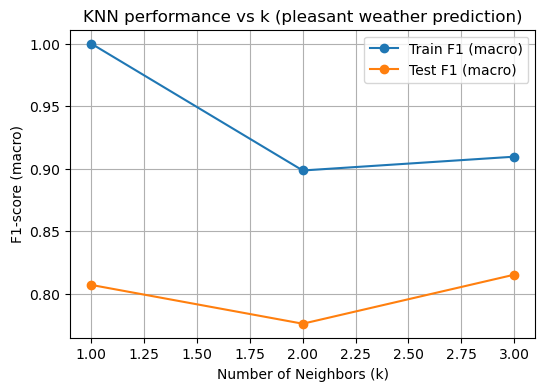


Summary table of k results:
k=1: Train F1=1.000, Test F1=0.807
k=2: Train F1=0.899, Test F1=0.776
k=3: Train F1=0.910, Test F1=0.815


In [12]:
# Plot F1-score vs k

plt.figure(figsize=(6, 4))
plt.plot(k_range, train_f1_macro, marker='o', label='Train F1 (macro)')
plt.plot(k_range, test_f1_macro, marker='o', label='Test F1 (macro)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('F1-score (macro)')
plt.title('KNN performance vs k (pleasant weather prediction)')
plt.legend()
plt.grid(True)

# Export plot
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/KNN_performance_versus_k.png"
plt.savefig(save_path, dpi=300)

plt.show()

print("\nSummary table of k results:")
for r in results:
    print(f"k={r['k']}: Train F1={r['train_f1_macro']:.3f}, "
          f"Test F1={r['test_f1_macro']:.3f}")


# Classification Report

In [13]:
# Choose final k and get detailed classification report

# Choose the k with the best test F1
best_idx = np.argmax(test_f1_macro)
best_k = k_range[best_idx]
print(f"\nBest k based on Test F1 (macro): {best_k}")

# Refit final model
base_knn_final = KNeighborsClassifier(n_neighbors=best_k)
clf_final = MultiOutputClassifier(base_knn_final, n_jobs=-1)
clf_final.fit(X_train, y_train)

y_test_pred_final = clf_final.predict(X_test)

# Flatten for overall binary classification_report
y_test_true_flat = y_test.values.ravel()
y_test_pred_flat = y_test_pred_final.ravel()

print("\n Classification report ")
print(classification_report(y_test_true_flat, y_test_pred_flat, zero_division=0))


Best k based on Test F1 (macro): 3

 Classification report 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     67859
           1       0.70      0.72      0.71     18211

    accuracy                           0.88     86070
   macro avg       0.81      0.82      0.82     86070
weighted avg       0.88      0.88      0.88     86070



# Confusion Matrices

Number of stations: 15
Stations: ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


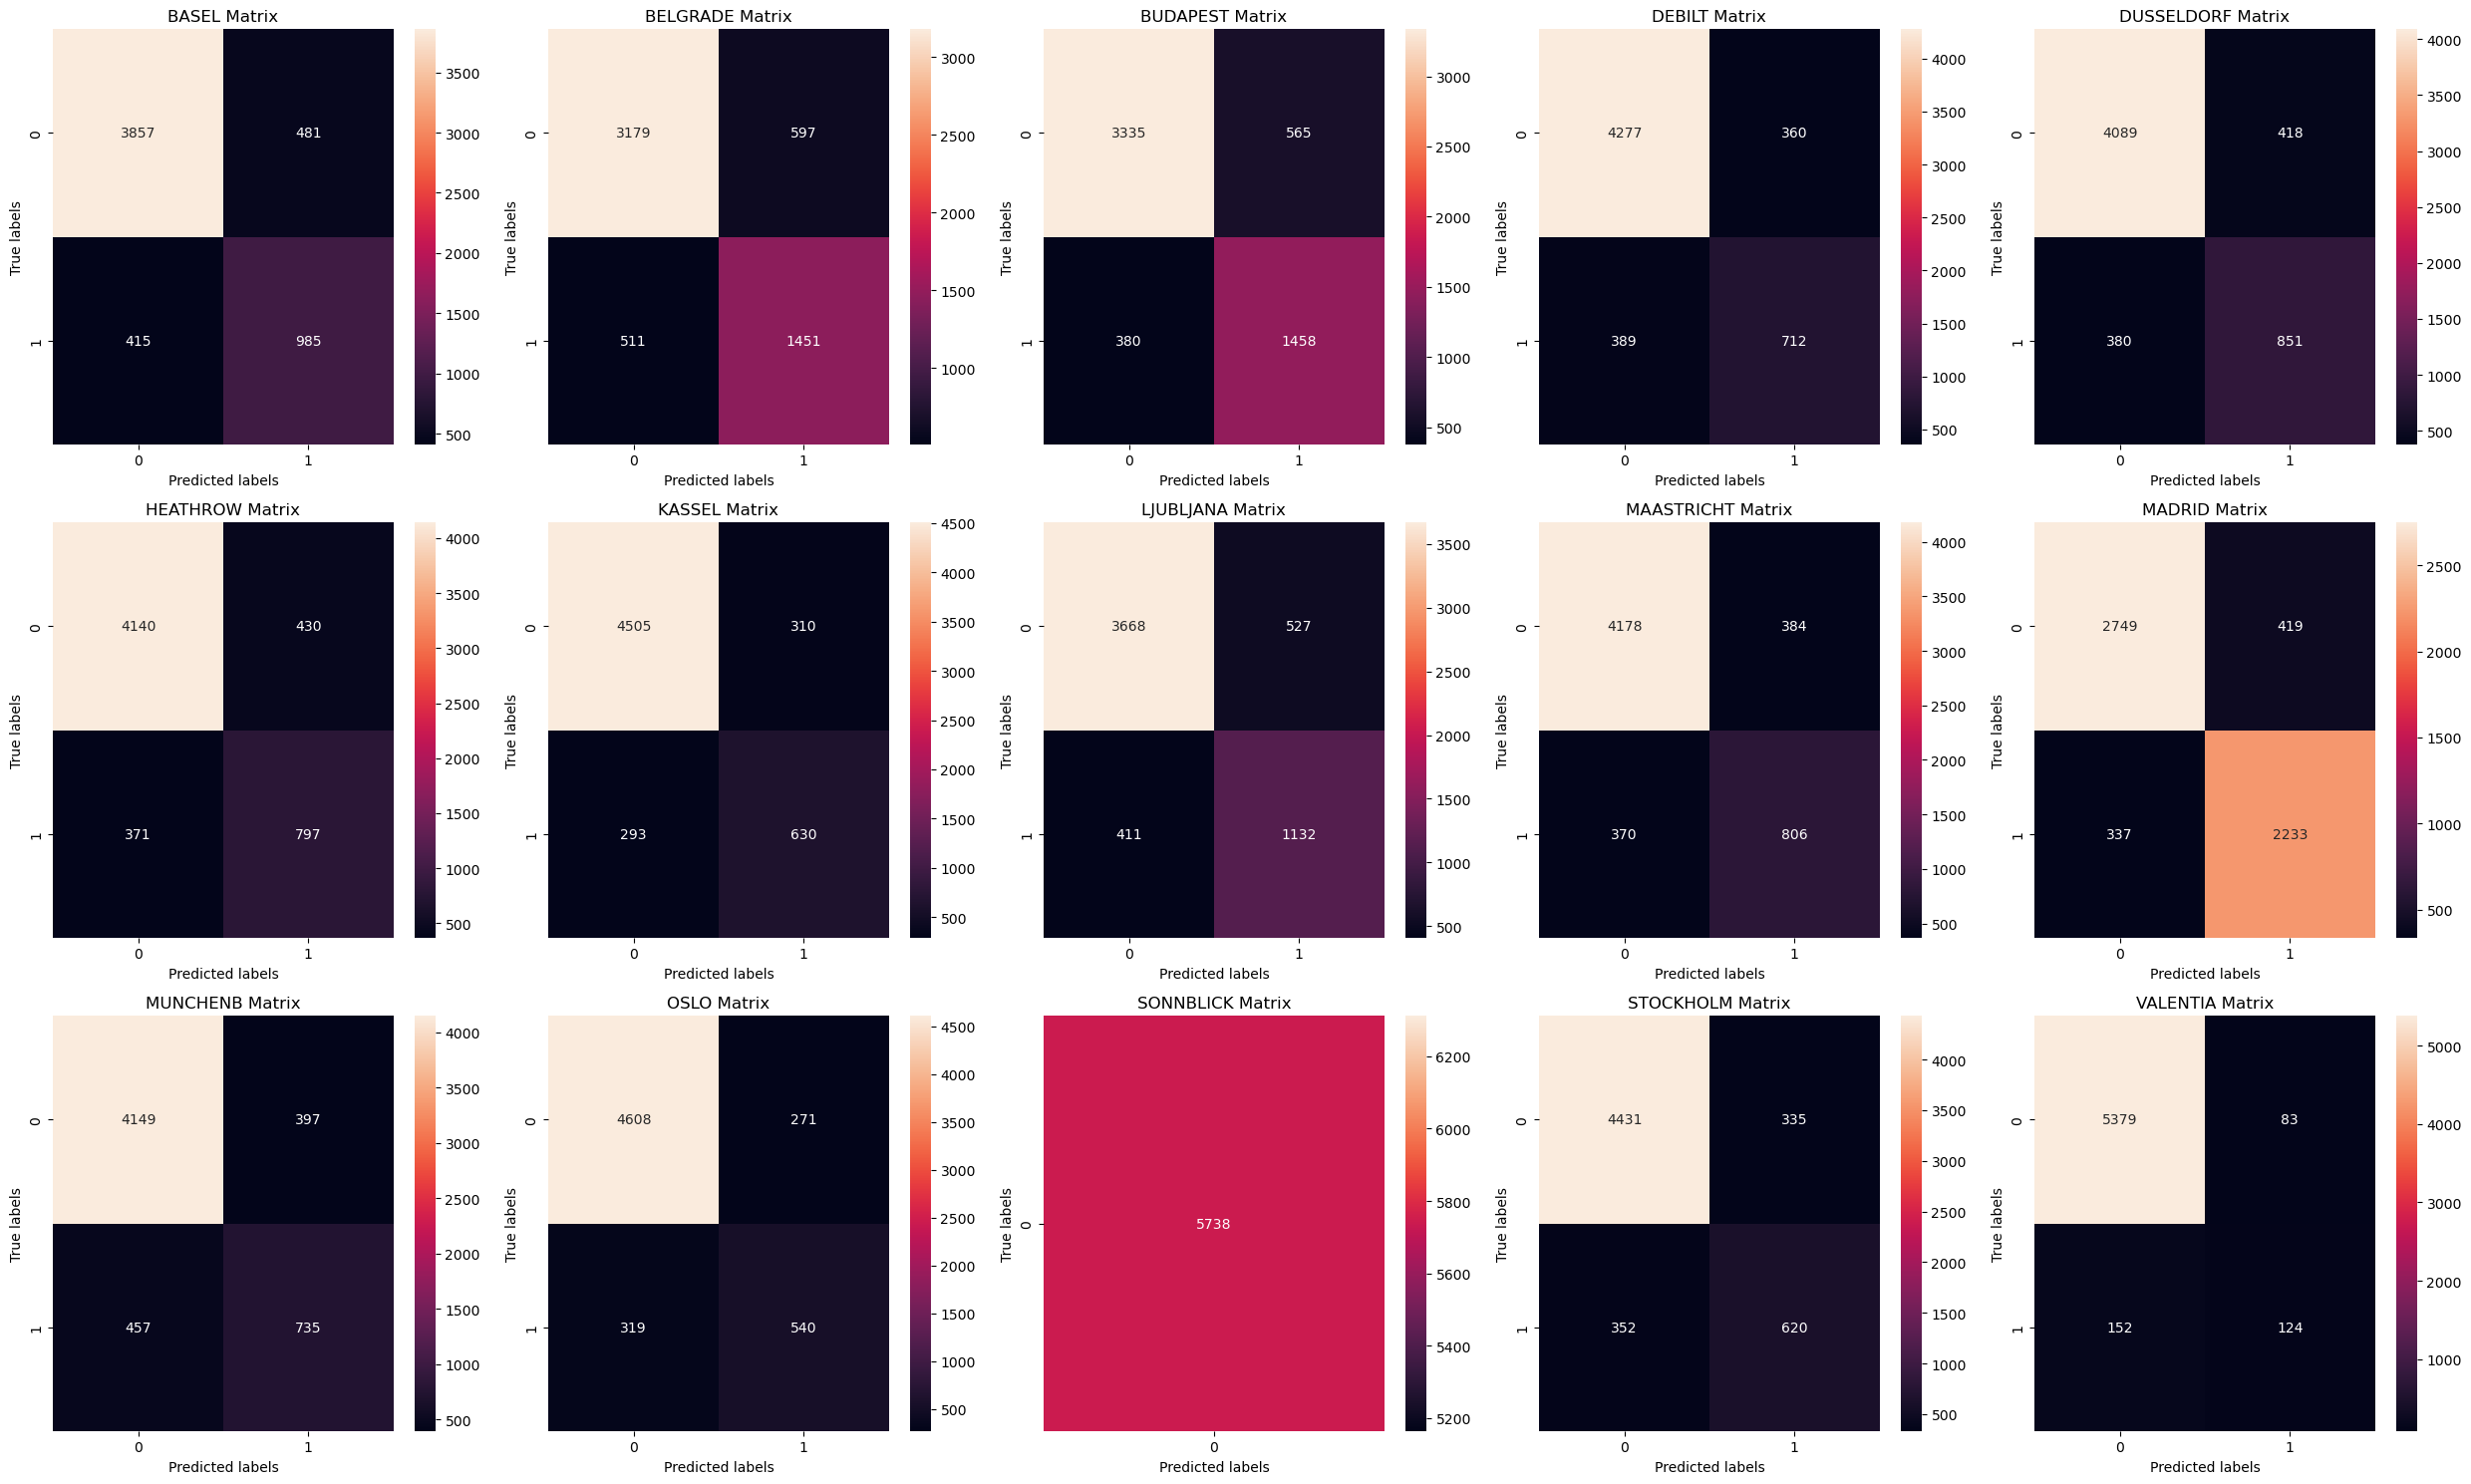

In [14]:
# Multi-station confusion matrices for final KNN model

# Station names from the *answer* columns, in order:
pleasant_suffix = "_pleasant_weather"
locations = [col.replace(pleasant_suffix, "") for col in y_test.columns]

print("Number of stations:", len(locations))
print("Stations:", locations)

# 3 x 5 grid for 15 stations
fig, axes = plt.subplots(3, 5, figsize=(25, 15))
axes = axes.ravel()

for idx, station in enumerate(locations):
    true_labels = y_test.iloc[:, idx]                  # column idx of y_test
    pred_labels = y_test_pred_final[:, idx]            # column idx of predictions

    cm = confusion_matrix(true_labels, pred_labels)

    ax = axes[idx]
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(f"{station} Matrix")

for j in range(len(locations), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# Export plot
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/1_4ConfusionMatrices.png"
plt.savefig(save_path, dpi=300)

plt.show()


In [17]:
# Plot accuracy table
pleasant_suffix = "_pleasant_weather"
stations = [col.replace(pleasant_suffix, "") for col in y_test.columns]

rows = []

for idx, station in enumerate(stations):
    true_labels = y_test.iloc[:, idx]
    pred_labels = y_test_pred_final[:, idx]
    
    if len(np.unique(true_labels)) == 1 or len(np.unique(pred_labels)) == 1:
       
        if np.array_equal(true_labels, pred_labels):
           
            if true_labels.iloc[0] == 1:  
                tp = len(true_labels)
                tn, fp, fn = 0, 0, 0
            else:  
                tn = len(true_labels)
                tp, fp, fn = 0, 0, 0
        else:
            
            if true_labels.iloc[0] == 1:  
                fn = len(true_labels)
                tp, tn, fp = 0, 0, 0
            else:  
                fp = len(true_labels)
                tp, tn, fn = 0, 0, 0
    else:
        
        cm = confusion_matrix(true_labels, pred_labels)
        tn, fp, fn, tp = cm.ravel()
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    rows.append({
        "Station": station,
        "True Negative": tn,
        "False Positive": fp,
        "False Negative": fn,
        "True Positive": tp,
        "Accuracy (%)": round(accuracy * 100, 2)
    })

station_summary_df = pd.DataFrame(rows)
station_summary_df


,Station,True Negative,False Positive,False Negative,True Positive,Accuracy (%)
0,BASEL,3857,481,415,985,84.38
1,BELGRADE,3179,597,511,1451,80.69
2,BUDAPEST,3335,565,380,1458,83.53
3,DEBILT,4277,360,389,712,86.95
4,DUSSELDORF,4089,418,380,851,86.09
5,HEATHROW,4140,430,371,797,86.04
6,KASSEL,4505,310,293,630,89.49
7,LJUBLJANA,3668,527,411,1132,83.65
8,MAASTRICHT,4178,384,370,806,86.86
9,MADRID,2749,419,337,2233,86.82
